## Introdução a Ciência de Dados

Professor: Yuri Malheiros

## Vendas de Games em diferentes plataformas e gêneros

 Projeto estruturado a partir de códigos gerados através do Python utilizando o Jupyter Notebook.

### Participantes:

Maria Carlyni Pereira de Oliveira

Mateus Fônseca Henriques

Silvan Souza da Silva Lopes

### Base de dados utlizado para a construção do projeto:  https://www.kaggle.com/gregorut/videogamesales

## Introdução

 O objetivo deste projeto está relacionado a análise do banco de dados como um todo, tendo como motivação abordar fatores como a manipulação de dados de acordo com gênero, ano, a plataforma em que se está situada e, por fim, as vendas.

## Descrição do dataset utilizado e sua exploração inicial


####  Este dataset contém uma lista de video games com venda estimada de mais de 100,000 cópias.






Rank - Ranking of overall sales

Name - The games name

Platform - Platform of the games release (i.e. PC,PS4, etc.)

Year - Year of the game's release

Genre - Genre of the game

Publisher - Publisher of the game

NA_Sales - Sales in North America (in millions)

EU_Sales - Sales in Europe (in millions)

JP_Sales - Sales in Japan (in millions)

Other_Sales - Sales in the rest of the world (in millions)

Global_Sales - Total worldwide sales.

In [14]:
# inserir exploração inicial
#IMPORT DAS BIBLIOTECAS E LEITURA DA BASE DE DADOS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from collections import Counter
import matplotlib.pyplot as plt

arq = pd.read_csv("vgsales.csv")
arq

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [2]:
media = arq.mean()
print("Media das colunas:")
media

Media das colunas:


Rank            8300.605254
Year            2006.406443
NA_Sales           0.264667
EU_Sales           0.146652
JP_Sales           0.077782
Other_Sales        0.048063
Global_Sales       0.537441
dtype: float64

In [3]:
mediana = arq.median()
print("Mediana das colunas:")
mediana

Mediana das colunas:


Rank            8300.50
Year            2007.00
NA_Sales           0.08
EU_Sales           0.02
JP_Sales           0.00
Other_Sales        0.01
Global_Sales       0.17
dtype: float64

<AxesSubplot:>

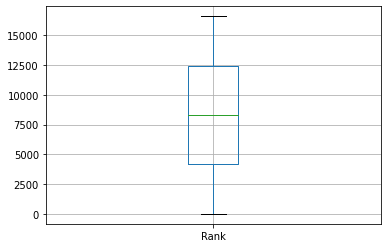

In [4]:
arq.boxplot(column=["Rank"])

<AxesSubplot:>

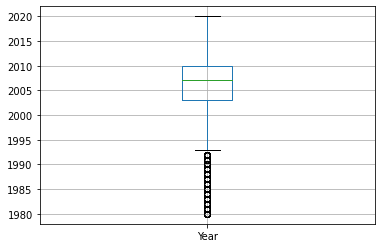

In [5]:
arq.boxplot(column=["Year"])

<AxesSubplot:>

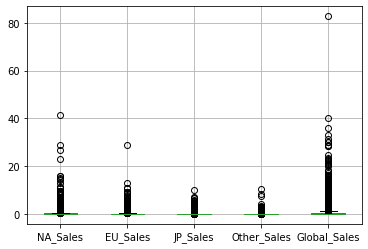

In [6]:
arq.boxplot(column=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"])

In [7]:
arq["Rank"].describe()

count    16598.000000
mean      8300.605254
std       4791.853933
min          1.000000
25%       4151.250000
50%       8300.500000
75%      12449.750000
max      16600.000000
Name: Rank, dtype: float64

# Pré-processamento



In [8]:
# /inserir a limpeza e transformação dos dados necessários/
arq = arq.fillna(0)
arq = arq.astype({"Year":  int})

In [9]:
arq.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


#As próximas células mostram que o comando "fillna" substituiu os valores nulos por "0".<p>
#Isso não gerará problemas já que as colunas com valores desconhecidos são "Year" e "Publisher"

In [11]:
arq["Year"][4199]

0

In [12]:
arq["Publisher"][16367]

0

# Perguntas 

1. De acordo com os anos, quais foram os anos em que a produção de jogo foi maior e se tem algum vínculo com os títulos mais vendidos?

In [16]:
arq = pd.read_csv('vgsales.csv')

In [17]:
arq = arq.fillna(0)
arq =arq.astype({"Year":  int})
arq

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [18]:
# inserir e executar o passo a passo para respondê-las
# (vocês devem utilizar regressão linear ou agrupamento em pelo menos uma pergunta)/
Year = arq.iloc[:,3:4]
#Contando os anos que produziram mais jogos
Year_counter = Counter(Year["Year"])

#Apagando a contagem para o ano zero, são aqueles que não possuíam esse dados e foram tratados
del Year_counter[0]

#Organizando por anos com maiores quantidades de jogos produzidos, caso usasse o sorted ele iria repetir os anos
Year_counter = Year_counter.most_common()
#sorted(Year_counter.elements())

New_Year = pd.DataFrame(Year_counter, columns=["Year","Production"])
New_Year

,Year,Production
0,2009,1431
1,2008,1428
2,2010,1259
3,2007,1202
4,2011,1139
5,2006,1008
6,2005,941
7,2002,829
8,2003,775
9,2004,763


<AxesSubplot:xlabel='Year', ylabel='Production'>

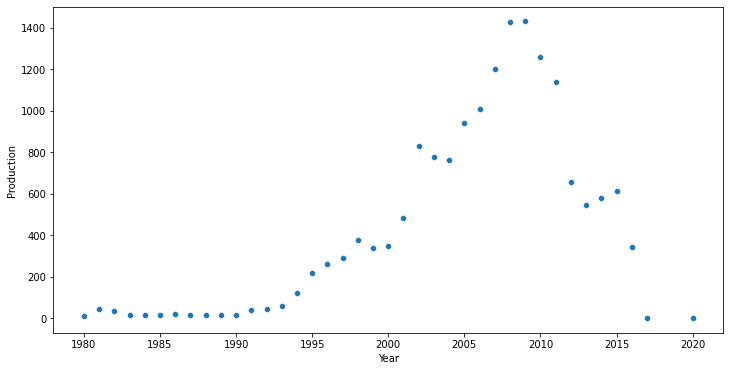

In [19]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=New_Year, x = "Year", y = "Production")

<AxesSubplot:xlabel='Year', ylabel='Production'>

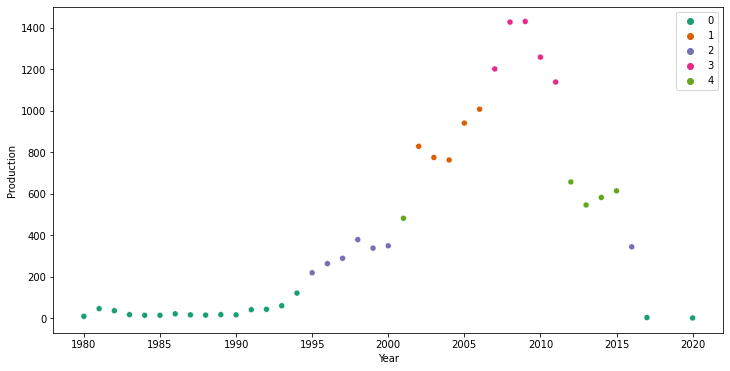

In [20]:
Year_group=New_Year[["Year", "Production"]]
Kmeans=KMeans(n_clusters=5)
Kmeans.fit(Year_group)
Kmeans.labels_
#CASO QUEIRA OS GENEROS NO EIXO X E OS VALORES NO EIXO Y
plt.figure(figsize=(12, 6))
sns.scatterplot(data=New_Year, x="Year", y="Production", hue = Kmeans.labels_, palette="Dark2")

2. Quais gêneros podemos comparar se analisarmos a venda dos jogos ao longos dos anos e como podemos identificar se foi de forma crescente ou decrescente?



In [21]:
# /inserir e executar o passo a passo para respondê-las 
# (vocês devem utilizar regressão linear ou agrupamento em pelo menos uma pergunta)/
Genre = arq.iloc[:,4:5]
Genre = Genre.sort_values("Genre")
Genre_counter = Counter(Genre["Genre"])
Genre_counter

Counter({'Action': 3316,
         'Adventure': 1286,
         'Fighting': 848,
         'Misc': 1739,
         'Platform': 886,
         'Puzzle': 582,
         'Racing': 1249,
         'Role-Playing': 1488,
         'Shooter': 1310,
         'Simulation': 867,
         'Sports': 2346,
         'Strategy': 681})

In [22]:
Genre_top = Genre_counter.most_common()
Genre=pd.DataFrame(Genre_top, columns=["Genre","Count"])
Genre

,Genre,Count
0,Action,3316
1,Sports,2346
2,Misc,1739
3,Role-Playing,1488
4,Shooter,1310
5,Adventure,1286
6,Racing,1249
7,Platform,886
8,Simulation,867
9,Fighting,848


<AxesSubplot:xlabel='Genre', ylabel='Count'>

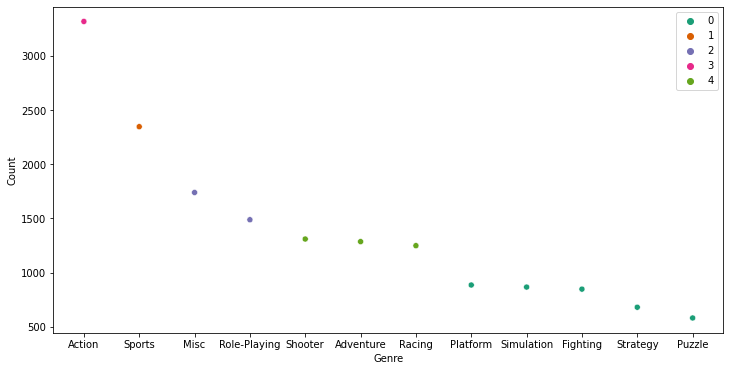

In [23]:
Genre_group=Genre[["Count"]]
Kmeans=KMeans(n_clusters=5)
Kmeans.fit(Genre_group)
Kmeans.labels_
#sns.scatterplot(data=Genre, x="Count", y="Genre", hue=Kmeans.labels_)
#CASO QUEIRA OS GENEROS NO EIXO X E OS VALORES NO EIXO Y
plt.figure(figsize=(12, 6))
sns.scatterplot(data=Genre, x="Genre", y="Count", hue = Kmeans.labels_, palette = "Dark2")

3. O impulso das vendas entre 2005 e 2010 está relacionado a determinada plataforma em que, por exemplo, o preço do console fez com que o jogo tivesse gerado um rendimento bom? 

In [9]:
# /inserir e executar o passo a passo para respondê-las 
# (vocês devem utilizar regressão linear ou agrupamento em pelo menos uma pergunta)/

# Conclusão

In [12]:
# resumir os resultados encontrados e explicar por que são importantes.
# apontar limitações, trabalhos futuros e melhorias que podem ser feitas.
